In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
survey_data = pd.read_csv('survey_results_public.csv', sep= ',')

In [3]:
survey_data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


**Задание 1**

Укажите размерность датасета, тип данных у колонки CompTotal и приведите код получения ответа.


In [4]:
print('Размерность датасета:', survey_data.shape)
print('Тип данных колонки CompTotal:', survey_data['CompTotal'].dtype)

Размерность датасета: (47980, 84)
Тип данных колонки CompTotal: float64


**Задание 2**

Определите самый частотный возраст, укажите, какой процент разработчиков имеет 5 или менее лет опыта, и приведите код получения ответа.


In [5]:
survey_data['Age'].value_counts()

,count
Age,
25-34 years old,18854
35-44 years old,12300
18-24 years old,8139
45-54 years old,4712
55-64 years old,1742
Under 18 years old,1452
65 years or older,580
Prefer not to say,201


По результатм вывода можно увидеть, что самый частотный возрас **25-34**

In [6]:
def checkExpirience(x):
  try:
    if x is np.nan or x == 'Less than 1 year' or int(x) <= 5 :
      return 1
    else:
      return 0
  except:
    return 0

tmp_df = survey_data.copy()
tmp_df['Less5'] = survey_data['YearsCodePro'].apply(checkExpirience)
print('Процент разработчиков, которые имеют 5 или менее лет опыта', tmp_df['Less5'].value_counts(normalize= True).iloc[1] * 100)

Процент разработчиков, которые имеют 5 или менее лет опыта 45.11254689453939


**Задание 3**

Укажите среднее значение месячной зарплаты разработчиков (округление в итоговом выводе не влияет на оценку, смотрим на формулу подсчета).

In [7]:
print('Cреднее значение месячной зарплаты разработчиков', survey_data['CompTotal'].mean() / 12)

Cреднее значение месячной зарплаты разработчиков 2967109963019343.0


**Задание 4**

Для датафрейма df_ru (страна = Russian Federation) постройте гистограмму (или любой другой график, похожий на гистограмму идейно) распределения заработной платы, переведите зарплату в помесячную и укажите сумму в тыс. р.

Text(0.5, 0, 'Месячная зп в тыс.р.')

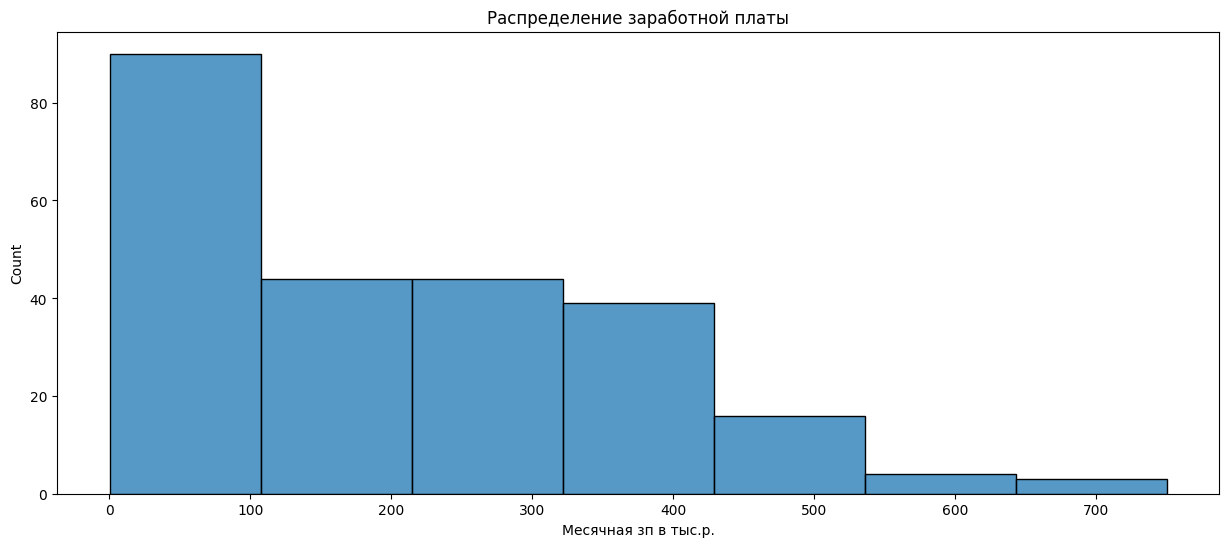

In [8]:
fig = plt.figure(figsize=(15, 6))
df_ru = survey_data[survey_data['Country'] == 'Russian Federation'].copy()
df_ru['MonthSalary'] = df_ru['CompTotal'] / 12000
histplot = sns.histplot(data= df_ru, x= 'MonthSalary',binwidth= 100)
histplot.set_title('Распределение заработной платы')
histplot.set_xlabel('Месячная зп в тыс.р.')

На графике можно увидеть, что большая часть распределения приходится на промежуток от **0 - 100 тыс.р.**, примерно столько же разработчиков получают от **200-400 тыс.р.**. Очевидно, далее с увеличением зп, количетсво разработчиков, получающие такие суммы, уменьшается. 6 разработчиков получают свыше **500 тыс.р.**

**Задание 5**

Получите список, в котором для каждого человека содержится список языков программирования, с которыми он работал, и приведите соответствующий код.

Найдите медиану количества языков из предыдущего списка (список языков, с которыми работал разработчик и которые он знает).Приведите код ее получения.

Укажите самый популярный язык и приведите верный код его получения / получения списка, где видно самый популярный язык.

In [10]:
def listOfLanguages(x):
  if x is not np.nan:
     return x.split(';')
  else:
    return []

def countLanguages(x):
  return len(x)

survey_data['ListOfLanguages'] = survey_data['LanguageHaveWorkedWith'].apply(listOfLanguages)
survey_data['NumOfLanguages'] = survey_data['ListOfLanguages'].apply(countLanguages)
display(survey_data['ListOfLanguages'])

print('Медиана количества языков, с которыми работал разработчик ', survey_data['NumOfLanguages'].median())

all_languages = survey_data['ListOfLanguages'].sum()
languages_count = Counter(all_languages)
most_popular = languages_count.most_common(1)
print('Самый популярный язык:', most_popular)

,ListOfLanguages
0,[]
1,"[HTML/CSS, JavaScript, Python]"
2,"[Bash/Shell (all shells), Go]"
3,"[Bash/Shell (all shells), HTML/CSS, JavaScript..."
4,"[HTML/CSS, JavaScript, TypeScript]"
...,...
47975,"[Assembly, C, C++, Groovy, HTML/CSS, Java, Jav..."
47976,"[Assembly, Bash/Shell (all shells), C, HTML/CS..."
47977,"[Python, SQL]"
47978,"[Bash/Shell (all shells), C, C#, C++, Dart, Gr..."


Медиана количества языков, с которыми работал разработчик  5.0
Самый популярный язык: [('JavaScript', 29891)]


**Задание 6**

Для датафрейма df_ru создайте колонку count_type, в которую сохранена частота встречаемости категории DevType для каждого человека, и приведите код подсчета.

Постройте boxplot-диаграмму распределения заработной платы по типам разработчиков.

,DevType,count_type
86,"Developer, full-stack",0.192534
95,"Developer, desktop or enterprise applications",0.064833
136,"Developer, desktop or enterprise applications",0.064833
199,"Developer, back-end",0.308448
233,"Engineer, site reliability",0.003929
...,...,...
47836,"Developer, front-end",0.074656
47881,"Developer, back-end",0.308448
47909,NaN,NaN
47916,"Developer, full-stack",0.192534


<ipython-input-11-e1e89456b351>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')


Text(0, 0.5, 'Месячная зп в тыс.р.')

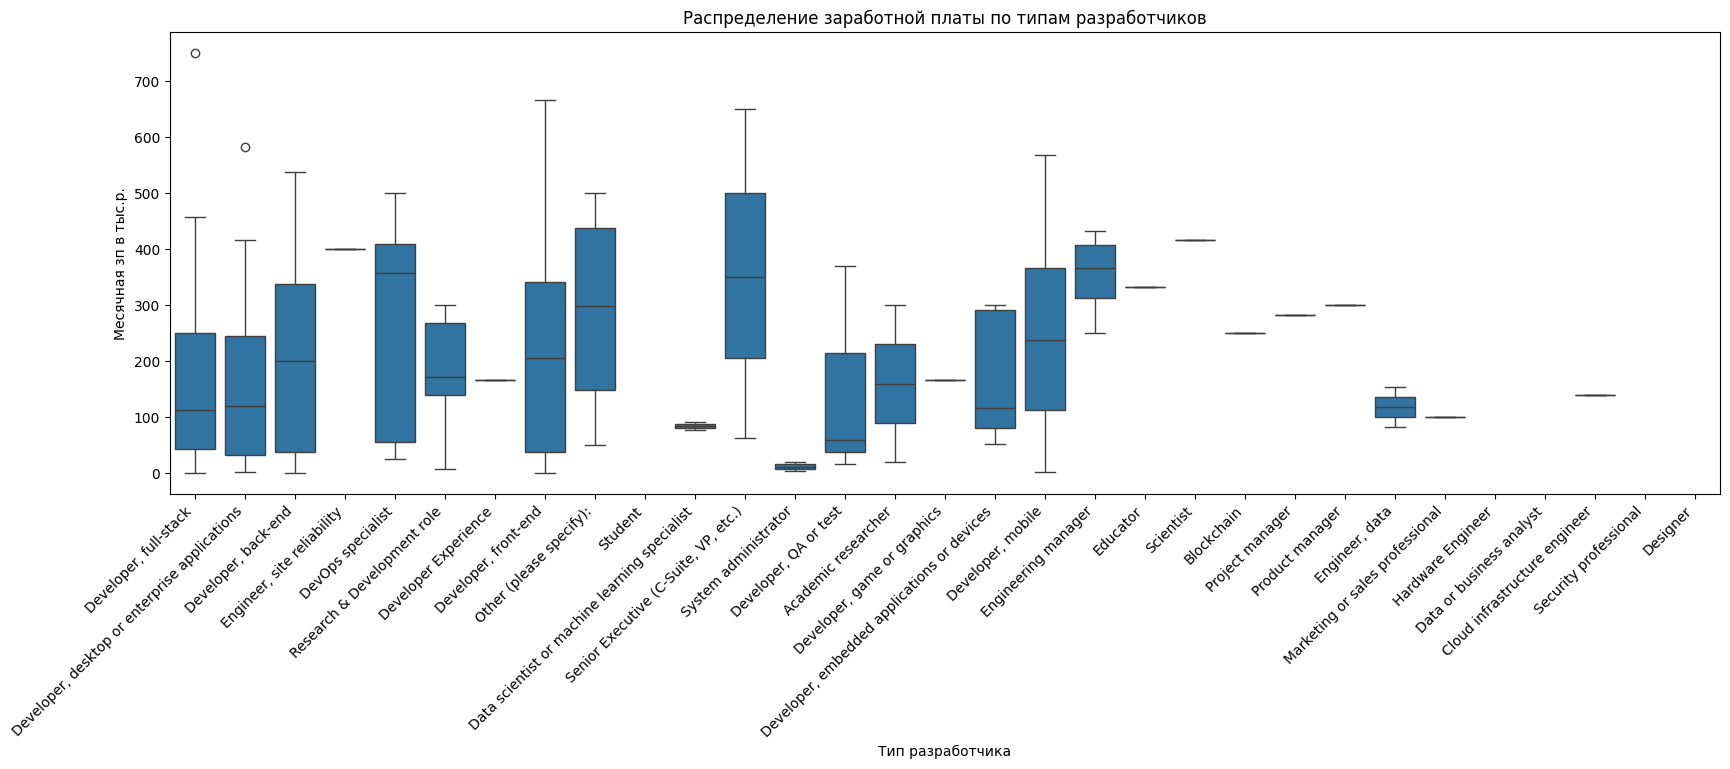

In [11]:
devtype_freq = df_ru['DevType'].value_counts(normalize= True)
df_ru['count_type'] = df_ru['DevType'].map(devtype_freq)
display(df_ru.loc[:, ['DevType', 'count_type']])

fig = plt.figure(figsize=(20, 6))
boxplot = sns.boxplot(data= df_ru, x= 'DevType', y= 'MonthSalary')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right')
boxplot.set_title('Распределение заработной платы по типам разработчиков')
boxplot.set_xlabel('Тип разработчика')
boxplot.set_ylabel('Месячная зп в тыс.р.')

По графику можно заметить, что самый большой размах у front-end разработчики, они так же имеют больше медиану, чем full-stack, back-end и др. разработчики. Можно заметить, что у многих типов разработчиков маленький размах, это может быть связано с маленькой частотностью таких разработчиков. У некоторых вовсе отсутствует график, это вызвано воздержанием расыкрытия зп или отсутсвиям работы, возможно, как у разработчиков типа Student.

**Задание 7**

Получите Series текстов из колонки SOAI, которые не принимают значение nan.

Найдите среднюю длину текстов по количеству слов.

Найдите среднюю длину слов во всех текстах.

Найдите 2 самых частых слова.

Постройте гистограмму частот первых 100 слов.

In [17]:
def getWords(x):
  seps = ['.', ',', ':', '?', '!', '(', ')', ';', '"', '[', ']', '{', '}', '/', '\\', '|', '+', '<', '>']
  for sep in seps:
    x = x.replace(sep, '')

  return x.split()

def meanLenOfWords(x):
  lst = []
  for word in x:
    lst.append(len(word))
  if len(lst) == 0:
    return 0
  else:
    return sum(lst) / len(lst)

soai_without_nan = survey_data['SOAI'].dropna()
display(soai_without_nan)

words = soai_without_nan.apply(getWords)
print('Средняя длина текстов по количеству слов', words.map(lambda x: len(x)).mean())

words_len = words.apply(meanLenOfWords)
print('Средняя длина слов во всех текстах', words_len.mean())

tmp = words.sum()
all_words = Counter(tmp)
print('2 самых частых слова:', all_words.most_common(2))

,SOAI
1,"I don't think it's super necessary, but I thin..."
3,I'm wearing of Stack Overflow using AI.
4,Using AI to suggest better answer to my questi...
6,Neutral
8,To suggest solutions in alternative language f...
...,...
47966,"Not a fan, I dont think SO needs AI tools righ..."
47970,Yes
47973,Review past comments for tone and flag snarky ...
47976,I think AI could be good for the time in some ...


Средняя длина текстов по количеству слов 17.32623864655206
Средняя длина слов во всех текстах 4.933015870796379
2 самых частых слова: [('to', 16226), ('the', 13976)]


Гистограмма постороенна на основе первых 100 слов и их частоты относительно этих 100 слов.

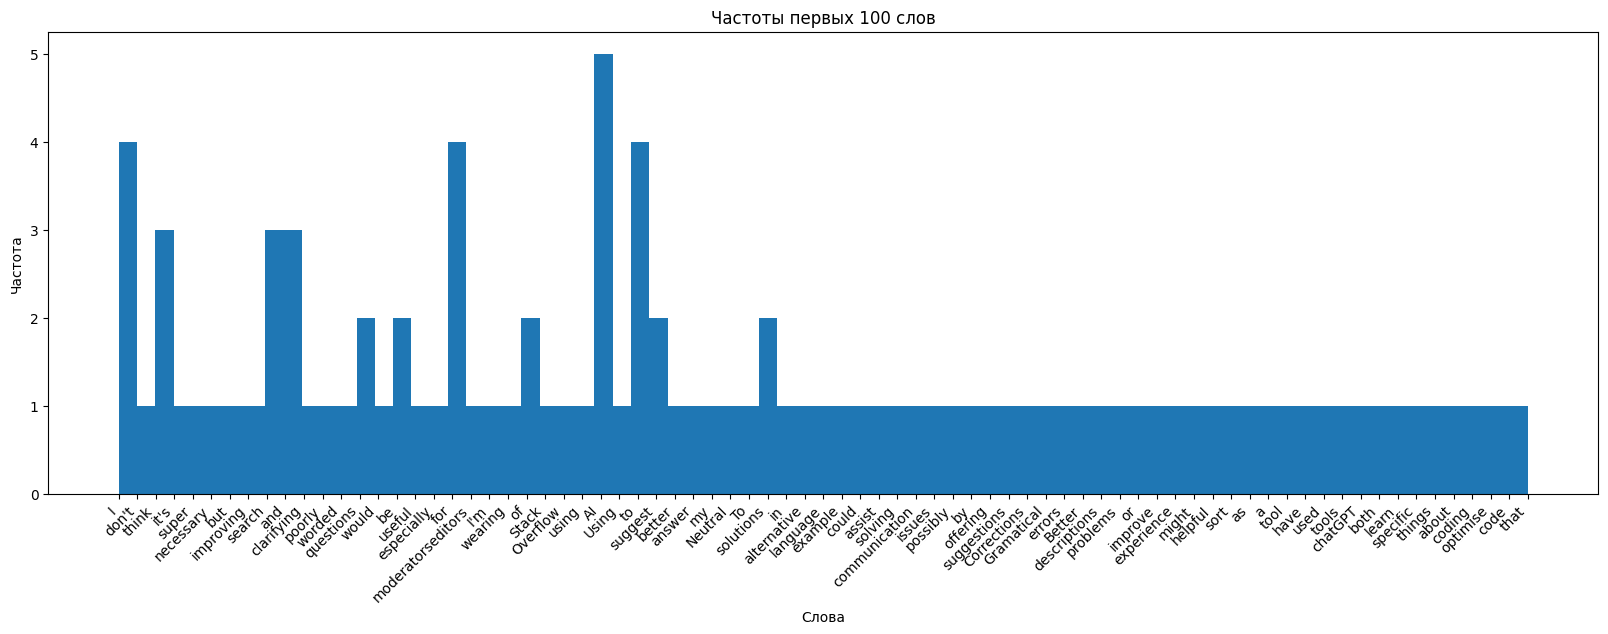

In [18]:
first_100_words = tmp[:101]
plt.figure(figsize=(20, 6))
plt.hist(first_100_words, bins=len(set(first_100_words)))
plt.xticks(rotation=45, ha='right')
plt.title("Частоты первых 100 слов")
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.show()

По графику видно, что чаще всего встречается слово AI (5 раз), затем слова I и for (по 4 раза).

**Задание 8**

В переменную docs сохраните все не пустые отзывы из переменной SOAI (для любого датафрейма).

Запустите код и напишите комментарий о том, как модель справилась с задачей.

Реализуйте функционал пяти любых инструментов из документации. Примените функции / вывод графика по датасету из документации.

In [24]:
docs = df_ru['SOAI'].dropna()
docs

,SOAI
86,Good solution
95,-
233,I think that would be good if StackOverflow st...
294,-
309,Find an answer if already exists. Verify synta...
...,...
47431,Human/AI sections/tools can co-exist but shoul...
47504,Ai can help with everything exclude posting an...
47510,A more accurate assessment of the relevance of...
47881,Offer solution to question currently being com...


Модель справилась, как и ожидалось, избавилась от значений Nan, однако остались комментарии, в которых '-', или другие варианты неинформативной информации. Это так же можно исправить вручную, при очистке данных.

In [25]:
display('Количество не пустых отзывов в SOAI', docs.shape[0])
df_ru.info()

236

<class 'pandas.core.frame.DataFrame'>
Index: 590 entries, 86 to 47974
Data columns (total 86 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           590 non-null    int64  
 1   Q120                                 590 non-null    object 
 2   MainBranch                           590 non-null    object 
 3   Age                                  590 non-null    object 
 4   Employment                           588 non-null    object 
 5   RemoteWork                           468 non-null    object 
 6   CodingActivities                     468 non-null    object 
 7   EdLevel                              590 non-null    object 
 8   LearnCode                            587 non-null    object 
 9   LearnCodeOnline                      471 non-null    object 
 10  LearnCodeCoursesCert                 198 non-null    object 
 11  YearsCode                         

С помощи функции shape, применяемой к docs, и функции info к dr_ru, можем посмотреть на 50 индекс и увидеть, что знаения не пустых отзывово совпадают.

In [22]:
df_ru['MonthSalary'].describe()

,MonthSalary
count,240.000000
mean,201.780435
std,166.804323
min,0.258333
25%,45.625000
50%,173.666667
75%,333.333333
max,750.000000


In [28]:
df_ru[df_ru['MonthSalary'] >= 600]['YearsCodePro']

,YearsCodePro
10515,20
35655,20
40000,15


Посмторим опыт работы у разработчиков, имеющие месячную зп больше или равной 600 тыс.р.

In [30]:
cols_null_percent = df_ru.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

,0
AINextVery similar,98.305085
AINextVery different,95.762712
AINextSomewhat similar,93.728814
AINextNeither different nor similar,93.220339
AIDevWantToWorkWith,89.661017
...,...
OpSysPersonal use,0.847458
LearnCode,0.508475
YearsCode,0.508475
Employment,0.338983


<Axes: title={'center': 'Распределение пропусков в данных'}, xlabel='Навзание столбцов', ylabel='Процентт пропусков в столбце'>

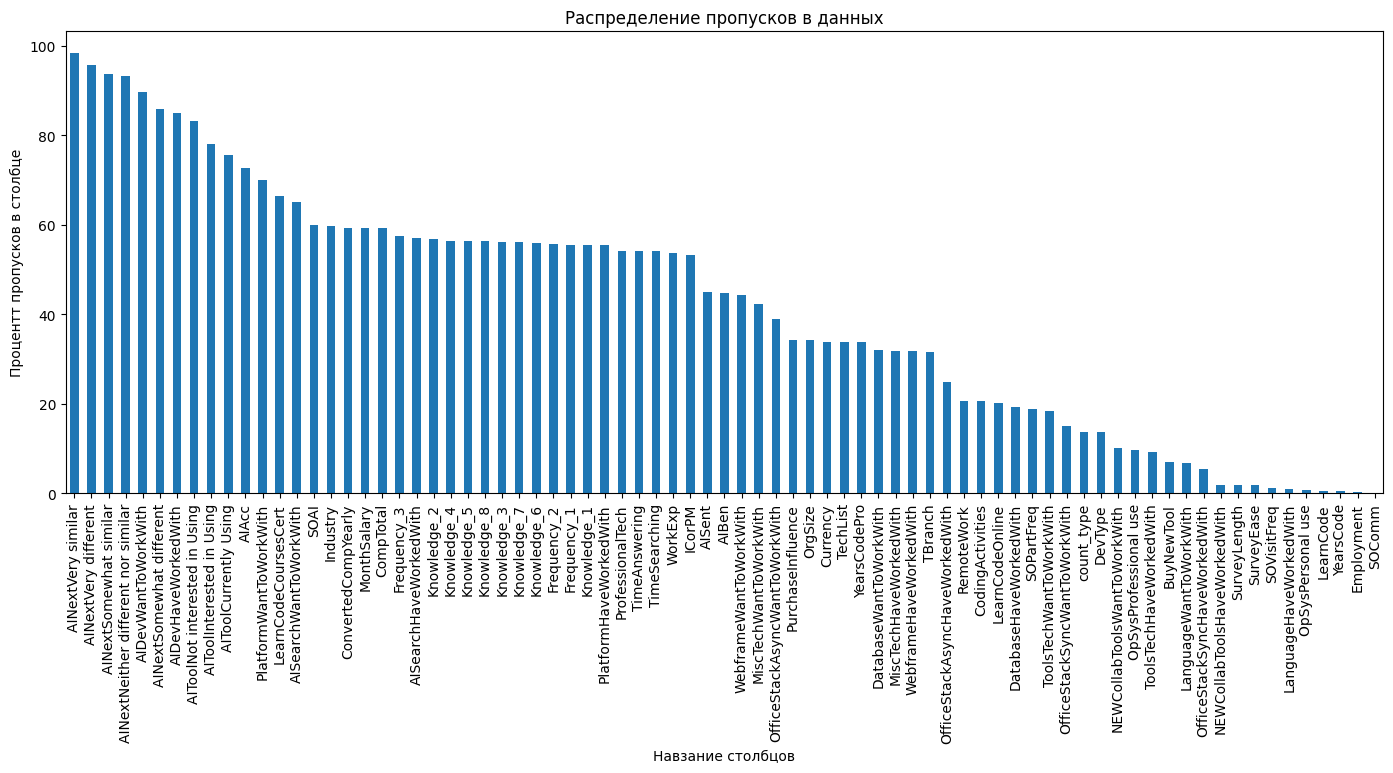

In [35]:
cols_with_null.plot(
    kind='bar',
    figsize=(17, 6),
    title='Распределение пропусков в данных',
    xlabel= 'Навзание столбцов',
    ylabel= 'Процентт пропусков в столбце'
)